In [1]:
from datetime import datetime as dt
start = dt.now()
import warnings
warnings.filterwarnings('ignore')
import datetime as dt     
dt.datetime.today().strftime("%m/%d/%Y")
import os as os
%matplotlib inline 
from IPython.display import HTML
import pandas as pd
import numpy as np
import os as os
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import YouTubeVideo 
from numpy import random as random
from IPython.display import IFrame
#import qgrid
os.chdir('C:/Users/falco/Desktop/directory/Humminbird_rescue/data/')
from bokeh.io import output_notebook
from bokeh.models.formatters import DatetimeTickFormatter
from bokeh.models import FixedTicker, HoverTool
import datetime as datetime
from dateutil.relativedelta import relativedelta
from matplotlib.colors import ListedColormap
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']
plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
#plt.rcParams['savefig.dpi'] = 3*plt.rcParams['savefig.dpi']
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.loc'] = 'center left'
plt.rcParams['axes.linewidth'] = 1
#sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
output_notebook()

Loading BokehJS ...

### Priliminary data exploration

Here we will do basic data exploration.
 

In [2]:
data = pd.read_excel('All rescue data 2020_modified July_2020.xlsx')
data.columns = ['Place', 'Case_Year', 'Admitted', 'Found_on', 'Brought_in_after', 'City', 'County', 'Reason', 'Reason_edited',
                'Reason_e', 'First_aid', 'Species', 'Species_e','Sex','Sex_e','Age','Age_e','G_O', 'Disposition', 'DDate', 'weight',
               'BCS', 'attitude', 'dehydration', 'head', 'CNS', 'cardiopulmonary', 'GI', 'musculoskeletal', 'integument',
               'body', 'forelimb', 'forelimb_e', 'hindlimb', 'hindlimb_e', 'treatment', 'Heat', 'Fluids', 'NSAID', 'Antibiotic', 'Steroid',
               'treatment_e']

data['admit_date'] = pd.to_datetime(data['Admitted'])
data['found_date'] = pd.to_datetime(data['Found_on'])
data['Brought_in_after'] = data['admit_date']-data['found_date']
data['Brought_in_after'] = data.Brought_in_after.dt.days
data['Admitted'] = pd.to_datetime(data['Admitted']).dt.strftime('%Y-%m-%d')
data['Found_on'] = pd.to_datetime(data['Found_on']).dt.strftime('%Y-%m-%d')

data.insert(0, 'New_ID', range(1, 1+len(data)))
data['ID'] = data["New_ID"].map(str) +'_' +data["Species"]
data.drop('New_ID', inplace= True, axis=1)
data.set_index(pd.DatetimeIndex(data['Admitted']), inplace= True, drop= False)
data.replace(' unknown', 'unknown', inplace= True)
data.replace('Found on the ground', 'found on the ground', inplace= True)
data.replace('cat caught', 'caught by domestic animal', inplace= True)
data.replace('Found inside', 'found inside', inplace= True)
data.replace('nest related ', 'nest-related', inplace= True)
data.replace('nest related', 'nest-related', inplace= True)
data.replace('orange county', 'Orange County', inplace= True)
data.replace('San mateo county', 'San Mateo County', inplace= True)
data.replace('orange county', 'Orange County', inplace= True)
data.replace('Unknown', 'unknown', inplace= True)
data.replace('nestling', 'Nestling', inplace= True)
data.replace('Selasphorus spp. ', 'Selasphorus spp.', inplace= True)
data.replace('Window hit', 'window hit', inplace= True)
data = data[data.G_O!= 'unknown']
sorted(data.Reason_e.unique().tolist())

['caught by domestic animal',
 'found inside',
 'found on the ground',
 'nest-related',
 'suspect torpor-like state',
 'unknown',
 'window hit']

### Columns in our data and their descritptions

    Place : One of three rescue centers               
    Case_Year : Year
    Admitted : date when it was admitted
    Found_on : date when it was actually found by rescuer
    Brought_in_after : Admitted - Found_on
    City : City/town where it was recued
    County: County of the City
    Reason_e : Reasons as recorded in the data and Cleaned up by Ruta
    First_aid : First aid given to the bird as recorded in the data
    Species : Species identification as in the data
    Sex : Sex identification, as in the data
    Age : Age identification, as in the data 
    Disposition : Final distpostion of the bird 
    DDate : DAte of disposition 
    ID : Unique ID created by Pranav to identify each rescued bird                  
    Reason :   Classification keys
    Collapsed : reasons classified into groups by Ruta: this classification still needs to be completed
    reason_coll: classification keys

data = pd.read_csv('All Rescue Data_Malibu_Lindsey_SB_RBedits_02_15_2019.csv')
data.columns = ['Place', 'Case_Year', 'Admitted', 'Found_on', 'Brought_in_after', 'City', 'County', 'Reason_e', 
               'First_aid', 'Species', 'Species_e','Sex','Sex_e','Age','Age_e','G_O', 'Disposition', 'DDate']
data['Admitted'] = pd.to_datetime(data['Admitted']).dt.strftime('%Y-%m-%d')
data['Found_on'] = pd.to_datetime(data['Found_on']).dt.strftime('%Y-%m-%d')
data.insert(0, 'New_ID', range(1, 1+len(data)))
data['ID'] = data["New_ID"].map(str) +'_' +data["Species"]
data.drop('New_ID', inplace= True, axis=1)

data.set_index(pd.DatetimeIndex(data['Admitted']), inplace= True, drop= False)
data.replace('unknown', 'Unknown', inplace= True)
data.replace('founf in the nest', 'found in the nest', inplace= True)
data.replace('orange county', 'Orange County', inplace= True)
data.replace('San mateo county', 'San Mateo County', inplace= True)
data.replace('orange county', 'Orange County', inplace= True)
data.replace('Domestic animal caught', 'caught by domestic animal', inplace= True)
data['reason'] = data.Collapsed
data.head()

In [3]:
data.columns.tolist()

['Place',
 'Case_Year',
 'Admitted',
 'Found_on',
 'Brought_in_after',
 'City',
 'County',
 'Reason',
 'Reason_edited',
 'Reason_e',
 'First_aid',
 'Species',
 'Species_e',
 'Sex',
 'Sex_e',
 'Age',
 'Age_e',
 'G_O',
 'Disposition',
 'DDate',
 'weight',
 'BCS',
 'attitude',
 'dehydration',
 'head',
 'CNS',
 'cardiopulmonary',
 'GI',
 'musculoskeletal',
 'integument',
 'body',
 'forelimb',
 'forelimb_e',
 'hindlimb',
 'hindlimb_e',
 'treatment',
 'Heat',
 'Fluids',
 'NSAID',
 'Antibiotic',
 'Steroid',
 'treatment_e',
 'admit_date',
 'found_date',
 'ID']

In [4]:
data[data.Age_e == 'Nestling'].Disposition.value_counts()

Released              1058
Died +24hr             210
Died in 24hr           147
Euthanized +24hr        99
Euthanized in 24hr      99
Dead on arrival         32
Name: Disposition, dtype: int64

In [5]:
data[data.Brought_in_after.isna()].Brought_in_after.head()

Series([], Name: Brought_in_after, dtype: int64)

In [6]:
data.ID.nunique()

6908

## Demographics

In [7]:
data.groupby(['G_O', 'Age_e']).ID.nunique()

G_O                   Age_e     
Non-selasphorus spp.  Nestling      1344
                      adult-like    4379
Selasphorus spp.      Nestling       301
                      adult-like     884
Name: ID, dtype: int64

In [8]:
data.groupby(['Species_e', 'Sex_e', 'G_O']).ID.nunique()

Species_e        Sex_e         G_O                 
ANHU             Female-like   Non-selasphorus spp.    3633
                 Male          Non-selasphorus spp.     689
BCHU             Female-like   Non-selasphorus spp.      39
                 Male          Non-selasphorus spp.       8
Non-selasphorus  unknown       Non-selasphorus spp.    1354
Selasphorus      Female-like   Selasphorus spp.         813
                 Male          Selasphorus spp.          71
                 unknown       Selasphorus spp.         301
Name: ID, dtype: int64

In [9]:
data.ID.nunique()

6908

In [10]:
data.groupby(['Age_e']).ID.nunique()

Age_e
Nestling      1645
adult-like    5263
Name: ID, dtype: int64

In [11]:
data.groupby(['Age_e']).ID.nunique()

Age_e
Nestling      1645
adult-like    5263
Name: ID, dtype: int64

In [12]:
data.groupby(['G_O']).ID.nunique()

G_O
Non-selasphorus spp.    5723
Selasphorus spp.        1185
Name: ID, dtype: int64

In [13]:
data.groupby(['G_O']).ID.nunique().sum()

6908

In [14]:
data[data.G_O == 'unknown'].Place.value_counts()

Series([], Name: Place, dtype: int64)

In [15]:
data.groupby(['G_O','Species']).ID.nunique()

G_O                   Species
Non-selasphorus spp.  ANHU       5648
                      BCHU         65
                      COHU         10
Selasphorus spp.      ALHU       1097
                      RUHU         88
Name: ID, dtype: int64

In [16]:
data.groupby(['G_O','Species']).ID.nunique() / data.ID.nunique()

G_O                   Species
Non-selasphorus spp.  ANHU       0.817603
                      BCHU       0.009409
                      COHU       0.001448
Selasphorus spp.      ALHU       0.158801
                      RUHU       0.012739
Name: ID, dtype: float64

In [17]:
data.G_O.unique()

array(['Non-selasphorus spp.', 'Selasphorus spp.'], dtype=object)

In [18]:
table1 = pd.DataFrame(data.groupby(['G_O','Species', 'Sex_e', 'Age_e']).ID.nunique())
table1

ID
G_O                  Species Sex_e        Age_e           
Non-selasphorus spp. ANHU    Female-like  adult-like  3633
                             Male         adult-like   689
                             unknown      Nestling    1326
                     BCHU    Female-like  adult-like    39
                             Male         adult-like     8
                             unknown      Nestling      18
                     COHU    unknown      adult-like    10
Selasphorus spp.     ALHU    Female-like  adult-like   746
                             Male         adult-like    53
                             unknown      Nestling     298
                     RUHU    Female-like  adult-like    67
                             Male         adult-like    18
                             unknown      Nestling       3

In [19]:
table1.to_csv('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Final_figures/tableS1.csv')

#### First 5 rows of the data looks like this

mapping = {'window hit': ['hit something', 'Window Hit'],
           'pets': ['Cat Caught', 'caught by domestic animal'],
          'found on ground': ['found on the ground', 'Found in the pool'],
          'nest':['Fell out of a nest', 'found in the nest'],
          'inside':['found inside'],
          'torpor':['found outside', 'Found at the feeder', 'found on the fence'], 
          'unknown': 'unknown'}

In [20]:
data.Reason_e.value_counts()

found on the ground          2950
unknown                      1103
nest-related                  943
caught by domestic animal     893
window hit                    663
found inside                  221
suspect torpor-like state     135
Name: Reason_e, dtype: int64

In [21]:
#data.replace('nest related', 'nest-related', inplace = True)

In [22]:
#data['r'] = data['reason_coll'].map(mapping)
#data.r.value_counts()
data['r'] = data.Reason_e

In [23]:
"""
def reason_outouts (c):
    if c.reason_coll == 'hit something' or c.reason_coll == 'Window Hit':
        return 'window hit'
    elif c.reason_coll == 'Cat Caught' or c.reason_coll == 'caught by domestic animal':
        return 'pets'
    elif c.reason_coll == 'found on the ground' or c.reason_coll == 'Found in the pool':
        return 'found on ground'
    elif c.reason_coll == 'Fell out of a nest' or c.reason_coll == 'found in the nest':
        return 'nest'
    elif c.reason_coll == 'found inside':
        return 'inside'
    elif c.reason_coll == 'found outside' or c.reason_coll == 'Found at the feeder' or c.reason_coll == 'found on the fence':
        return 'torpor'
    elif c.reason_coll == 'unknown':
        return 'unknown'
    
data['r'] = data.apply(reason_outouts, axis=1)
"""
data.r.value_counts()    

found on the ground          2950
unknown                      1103
nest-related                  943
caught by domestic animal     893
window hit                    663
found inside                  221
suspect torpor-like state     135
Name: r, dtype: int64

In [24]:
reasosn_perc = pd.DataFrame(data.r.value_counts(normalize=True))    
reasosn_val = pd.DataFrame(data.r.value_counts())
reasons_table = pd.concat([reasosn_val, reasosn_perc], axis=1)
reasons_table.columns = ['Number', 'Proportion']
reasons_table['Proportion'] = reasons_table['Proportion']*100
reasons_table['Proportion'] = reasons_table['Proportion'].apply('{:.1f}'.format)
reasons_table['Proportion_str'] = reasons_table['Proportion']+'%'
reasons_table = reasons_table.reset_index()
reasons_table

,index,Number,Proportion,Proportion_str
0,found on the ground,2950,42.7,42.7%
1,unknown,1103,16.0,16.0%
2,nest-related,943,13.7,13.7%
3,caught by domestic animal,893,12.9,12.9%
4,window hit,663,9.6,9.6%
5,found inside,221,3.2,3.2%
6,suspect torpor-like state,135,2.0,2.0%


In [25]:
#reasons_table.replace('torpor', 'suspect torpor state', inplace =True)
#reasons_table.replace('inside', 'found inside', inplace =True)
#reasons_table.replace('pets', 'caught by domestic animal', inplace =True)
#reasons_table.replace('nest', 'nest-related', inplace =True)

In [26]:
mappings = {'found on the ground': 6,
 'unknown': 5,
 'nest-related': 3,
 'caught by domestic animal': 4,
 'window hit': 2,
 'found inside': 1,
 'suspect torpor-like state': 0}

In [27]:
import pandas.api.types as pdtypes

from plotnine import *
from plydata import *

p = (ggplot()
     + geom_segment(
     reasons_table,
     aes(x=0, xend='Number', y='index', yend='index'),
     size=6,
     color='#0a3370'
 )
     # Age group markers
 + geom_point(
     reasons_table,
     aes('Number', 'index'),
     size=5,
     stroke=0.7, 
     color = '#FC8D62'

 )
     + geom_text(
     reasons_table,
     aes(x='Number+500.0', y='index', label='Proportion_str', ),
     size=12,
     ha='right',
 )
 + xlab('Number of individuals')+ ylab('Reasons for admission')
 + scale_y_discrete(limits=mappings, reverse=False) 
 + theme_538()
 + theme(figure_size=(6, 3))
)
#ggsave(plot=p, filename='C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Final_figures/Figure3.svg')
#ggsave(plot=p, filename='C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Final_figures/Figure3.png', dpi = 600)
p

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
646/float(data.shape[0])

In [28]:
884/float(data.shape[0])

0.12796757382744645

In [29]:
data.Disposition.value_counts()

Released              2485
Died in 24hr          1736
Euthanized in 24hr    1106
Died +24hr             668
Euthanized +24hr       562
Dead on arrival        351
Name: Disposition, dtype: int64

In [30]:
data.Disposition.value_counts()/data.ID.nunique()*100

Released              35.972785
Died in 24hr          25.130284
Euthanized in 24hr    16.010423
Died +24hr             9.669948
Euthanized +24hr       8.135495
Dead on arrival        5.081065
Name: Disposition, dtype: float64

In [31]:
1699/6931*100

24.513057278891935

In [32]:
2412/6931*100

34.80017313518972

In [33]:
def DOA (c):
    if c.Disposition == 'Released':
        return 'Released'
    else:
        return 'Died'
data['Disposition_binary'] = data.apply(DOA, axis=1)

In [34]:
data['First_aid'].value_counts()

unknown                  4551
sugar water              1544
nectar                    405
water                     195
honey water                54
dextose solution           51
bugs, sugar water          32
bugs, water                10
fruit juice                 9
bugs, nectar                8
bread, water                7
Water                       6
Sugar water                 4
bugs, honey                 3
electrolyte solution        3
bread, milk                 3
Roudybush Lory nectar       3
water, karo syrup           3
bugs                        3
water, puppy food           2
milk                        2
nectar                      1
water                       1
bread                       1
water, pinenuts             1
fruit juice                 1
rootbeer                    1
water, protein powder       1
water, egg white            1
Nectar                      1
bread                       1
Name: First_aid, dtype: int64

In [35]:
def First_Aid (c):
    if c.First_aid== 'unknown':
        return 'No'
    else:
        return 'Yes'
data['F_Aid'] = data.apply(First_Aid, axis=1)

In [36]:
data['F_Aid'].value_counts()

No     4551
Yes    2357
Name: F_Aid, dtype: int64

In [37]:
data.groupby(['Age_e', 'Disposition_binary']).ID.nunique()

Age_e       Disposition_binary
Nestling    Died                   587
            Released              1058
adult-like  Died                  3836
            Released              1427
Name: ID, dtype: int64

In [38]:
data.Age_e.value_counts()

adult-like    5263
Nestling      1645
Name: Age_e, dtype: int64

In [39]:
data.groupby(['Age_e', 'Disposition_binary']).ID.nunique()

Age_e       Disposition_binary
Nestling    Died                   587
            Released              1058
adult-like  Died                  3836
            Released              1427
Name: ID, dtype: int64

In [40]:
pd.DataFrame(data.groupby(['G_O','Sex_e', 'Age_e', 'Disposition_binary']).ID.nunique()).sum()

ID    6908
dtype: int64

In [41]:
aa = pd.DataFrame(data.groupby(['G_O','Sex_e', 'Age_e', 'Disposition_binary']).ID.nunique())
aa

ID
G_O                  Sex_e        Age_e      Disposition_binary      
Non-selasphorus spp. Female-like  adult-like Died                2647
                                             Released            1025
                     Male         adult-like Died                 545
                                             Released             152
                     unknown      Nestling   Died                 474
                                             Released             870
                                  adult-like Died                  10
Selasphorus spp.     Female-like  adult-like Died                 572
                                             Released             241
                     Male         adult-like Died                  62
                                             Released               9
                     unknown      Nestling   Died                 113
                                             Released             188

In [42]:
aa.xs('Released', level = 3).sum()

ID    2485
dtype: int64

In [43]:
aa.xs('Released', level = 3).sum()/pd.DataFrame(data.groupby(['G_O','Sex_e', 'Age_e', 'Disposition_binary']).ID.nunique()).sum()

ID    0.359728
dtype: float64

In [44]:
aa.xs('Non-selasphorus spp.', level = 0).sum()

ID    5723
dtype: int64

In [45]:
aa.xs('Selasphorus spp.', level = 0).sum()

ID    1185
dtype: int64

In [46]:
#aa.xs('unknown', level = 0).sum()

In [47]:
aa.xs('Nestling', level = 2).sum()

ID    1645
dtype: int64

In [48]:
aa.xs('Nestling', level = 2)

ID
G_O                  Sex_e   Disposition_binary     
Non-selasphorus spp. unknown Died                474
                             Released            870
Selasphorus spp.     unknown Died                113
                             Released            188

In [49]:
data.columns

Index(['Place', 'Case_Year', 'Admitted', 'Found_on', 'Brought_in_after',
       'City', 'County', 'Reason', 'Reason_edited', 'Reason_e', 'First_aid',
       'Species', 'Species_e', 'Sex', 'Sex_e', 'Age', 'Age_e', 'G_O',
       'Disposition', 'DDate', 'weight', 'BCS', 'attitude', 'dehydration',
       'head', 'CNS', 'cardiopulmonary', 'GI', 'musculoskeletal', 'integument',
       'body', 'forelimb', 'forelimb_e', 'hindlimb', 'hindlimb_e', 'treatment',
       'Heat', 'Fluids', 'NSAID', 'Antibiotic', 'Steroid', 'treatment_e',
       'admit_date', 'found_date', 'ID', 'r', 'Disposition_binary', 'F_Aid'],
      dtype='object')

In [50]:
data['month'] = data.index.month

In [51]:
def make_seasons(c):
    if (c.month == 12)|(c.month == 1)|(c.month == 2):
        return 'Winter'
    elif (c.month == 3)|(c.month == 4)|(c.month == 5):
        return 'Spring'
    elif (c.month == 6)|(c.month == 7)|(c.month == 8):
        return 'Summer'
    elif (c.month == 9)|(c.month == 10)|(c.month == 11):
        return 'Fall'

In [52]:
def make_seasons(c):
    if (c.month == 12)|(c.month == 1)|(c.month == 2):
        return 'Winter'
    elif (c.month == 3)|(c.month == 4)|(c.month == 5):
        return 'Spring'
    elif (c.month == 6)|(c.month == 7)|(c.month == 8):
        return 'Summer'
    elif (c.month == 9)|(c.month == 10)|(c.month == 11):
        return 'Fall'
data['season'] = data.apply(make_seasons, axis=1)

In [53]:
data.G_O.value_counts()

Non-selasphorus spp.    5723
Selasphorus spp.        1185
Name: G_O, dtype: int64

In [54]:
data.groupby(['Sex'])['Sex_e'].unique()


Sex
Female     [Female-like , unknown]
Male               [Male, unknown]
unknown    [Female-like , unknown]
Name: Sex_e, dtype: object

In [55]:
data.groupby(['Sex', 'Age_e'])['ID'].nunique()

Sex      Age_e     
Female   Nestling        79
         adult-like     714
Male     Nestling        82
         adult-like     768
unknown  Nestling      1484
         adult-like    3781
Name: ID, dtype: int64

In [56]:
m_d = data[['Disposition_binary', 'Place', 'F_Aid', 'Species_e', 'Sex_e', 'Age_e', 'Brought_in_after','season', 'r', 'G_O']]
m_d.head(15)

,Disposition_binary,Place,F_Aid,Species_e,Sex_e,Age_e,Brought_in_after,season,r,G_O
Admitted,,,,,,,,,,
1991-01-02,Died,Lindsey,No,ANHU,Female-like,adult-like,1,Winter,found on the ground,Non-selasphorus spp.
1991-01-02,Released,Lindsey,Yes,ANHU,Female-like,adult-like,0,Winter,unknown,Non-selasphorus spp.
1991-01-04,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Winter,suspect torpor-like state,Non-selasphorus spp.
1991-01-05,Died,Lindsey,No,ANHU,Female-like,adult-like,4,Winter,unknown,Non-selasphorus spp.
1991-01-05,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Winter,caught by domestic animal,Non-selasphorus spp.
1991-01-05,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Winter,found on the ground,Non-selasphorus spp.
1991-01-06,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Winter,window hit,Non-selasphorus spp.
1991-01-07,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Winter,window hit,Non-selasphorus spp.
1991-01-08,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Winter,found on the ground,Non-selasphorus spp.


In [57]:
m_d = m_d[(m_d.G_O == 'Non-selasphorus spp.') |(m_d.G_O == 'Selasphorus spp.')]

In [58]:
m_d.season.value_counts()

Spring    3138
Summer    2136
Winter    1032
Fall       602
Name: season, dtype: int64

In [59]:
m_d.shape

(6908, 10)

In [60]:
data.groupby(['Age_e','Sex_e'])['Sex_e'].count()

Age_e       Sex_e       
Nestling    unknown         1645
adult-like  Female-like     4485
            Male             768
            unknown           10
Name: Sex_e, dtype: int64

In [61]:
data.groupby(['Age_e','Species_e'])['Species_e'].count()

Age_e       Species_e      
Nestling    Non-selasphorus    1344
            Selasphorus         301
adult-like  ANHU               4322
            BCHU                 47
            Non-selasphorus      10
            Selasphorus         884
Name: Species_e, dtype: int64

In [62]:
data.groupby(['Sex_e','Species_e'])['Species_e'].count()

Sex_e         Species_e      
Female-like   ANHU               3633
              BCHU                 39
              Selasphorus         813
Male          ANHU                689
              BCHU                  8
              Selasphorus          71
unknown       Non-selasphorus    1354
              Selasphorus         301
Name: Species_e, dtype: int64

In [63]:
ls = []
for col in m_d:
    ls.append(col)
    uniques = m_d[col].unique().tolist()
    for u in uniques:
        ls.append(u)
u = pd.DataFrame({'Unique_values':ls})
u.to_csv('C:/Users/falco/Desktop/directory/Humminbird_rescue/data/Uniques_data.csv')

In [64]:
m_d.to_csv('C:/Users/falco/Desktop/directory/Humminbird_rescue/data/Model_data.csv')

In [65]:
data.columns

Index(['Place', 'Case_Year', 'Admitted', 'Found_on', 'Brought_in_after',
       'City', 'County', 'Reason', 'Reason_edited', 'Reason_e', 'First_aid',
       'Species', 'Species_e', 'Sex', 'Sex_e', 'Age', 'Age_e', 'G_O',
       'Disposition', 'DDate', 'weight', 'BCS', 'attitude', 'dehydration',
       'head', 'CNS', 'cardiopulmonary', 'GI', 'musculoskeletal', 'integument',
       'body', 'forelimb', 'forelimb_e', 'hindlimb', 'hindlimb_e', 'treatment',
       'Heat', 'Fluids', 'NSAID', 'Antibiotic', 'Steroid', 'treatment_e',
       'admit_date', 'found_date', 'ID', 'r', 'Disposition_binary', 'F_Aid',
       'month', 'season'],
      dtype='object')

In [66]:
data[data.Age_e =='Nestling'].groupby([pd.Grouper(freq='M'), 'Disposition_binary'])['ID'].nunique()
lambda x: x.month

<function __main__.<lambda>(x)>

In [67]:
data.columns

Index(['Place', 'Case_Year', 'Admitted', 'Found_on', 'Brought_in_after',
       'City', 'County', 'Reason', 'Reason_edited', 'Reason_e', 'First_aid',
       'Species', 'Species_e', 'Sex', 'Sex_e', 'Age', 'Age_e', 'G_O',
       'Disposition', 'DDate', 'weight', 'BCS', 'attitude', 'dehydration',
       'head', 'CNS', 'cardiopulmonary', 'GI', 'musculoskeletal', 'integument',
       'body', 'forelimb', 'forelimb_e', 'hindlimb', 'hindlimb_e', 'treatment',
       'Heat', 'Fluids', 'NSAID', 'Antibiotic', 'Steroid', 'treatment_e',
       'admit_date', 'found_date', 'ID', 'r', 'Disposition_binary', 'F_Aid',
       'month', 'season'],
      dtype='object')

In [68]:
data.groupby(['Sex_e', 'r','Age_e']).ID.nunique().to_excel('Table_Sex_Reason_age.xlsx')

In [69]:
data.groupby(['r','Age_e']).ID.nunique().to_excel('Table_Reason_age.xlsx')

In [70]:
os.getcwd()

'C:\\Users\\falco\\Desktop\\directory\\Humminbird_rescue\\data'

In [71]:
data.groupby(['r', 'Age_e']).ID.nunique()

r                          Age_e     
caught by domestic animal  Nestling        86
                           adult-like     807
found inside               Nestling         2
                           adult-like     219
found on the ground        Nestling       609
                           adult-like    2341
nest-related               Nestling       752
                           adult-like     191
suspect torpor-like state  adult-like     135
unknown                    Nestling       196
                           adult-like     907
window hit                 adult-like     663
Name: ID, dtype: int64

In [72]:
data.groupby(['Sex_e', 'r']).ID.nunique()

Sex_e         r                        
Female-like   caught by domestic animal     726
              found inside                  184
              found on the ground          1939
              nest-related                  175
              suspect torpor-like state      99
              unknown                       820
              window hit                    542
Male          caught by domestic animal      81
              found inside                   35
              found on the ground           395
              nest-related                   16
              suspect torpor-like state      36
              unknown                        84
              window hit                    121
unknown       caught by domestic animal      86
              found inside                    2
              found on the ground           616
              nest-related                  752
              unknown                       199
Name: ID, dtype: int64

In [73]:
data.groupby(['Age_e', 'Sex_e']).ID.nunique()

Age_e       Sex_e       
Nestling    unknown         1645
adult-like  Female-like     4485
            Male             768
            unknown           10
Name: ID, dtype: int64

## Figure for time-line and disposition

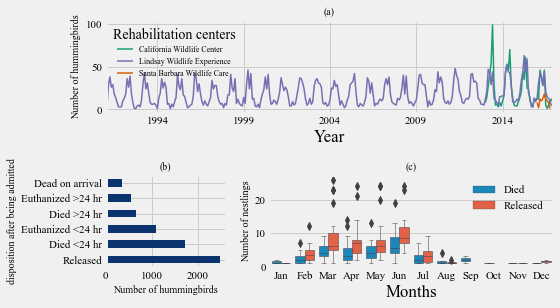

In [75]:
fig = plt.figure(figsize = [8,4.5])
grid = fig.add_gridspec(2, 3)
ax1 = plt.subplot(grid[0, 0:])
ax2 = plt.subplot(grid[1, 0])
ax3 = plt.subplot(grid[1, 1:])


data.replace('malibu', 'Malibu', inplace = True)
data.replace('Malibu', 'California Wildlife Center', inplace = True)
data.replace('Santa Barbara', 'Santa Barbara Wildlife Care', inplace = True)
data.replace('Lindsey', 'Lindsay Wildlife Experience', inplace = True)
data['Disposition_edited'] = data.Disposition
              
data['Disposition_edited'].replace('Died in 24hr', 'Died <24 hr', inplace = True)
data['Disposition_edited'].replace('Euthanized in 24hr', 'Euthanized <24 hr', inplace = True)
data['Disposition_edited'].replace('Died +24hr', 'Died >24 hr', inplace = True)
data['Disposition_edited'].replace('Euthanized +24hr','Euthanized >24 hr', inplace = True)


data.groupby([pd.Grouper(freq='M'), 'Place'])['ID'].nunique().unstack().plot(lw=1.5, ax = ax1, color = ['#1b9e77','#7570b3', '#d95f02'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of hummingbirds', fontsize = 10)
ax1.legend(title="Rehabilitation centers", loc = 'upper left', fontsize = 8)

data.Disposition_edited.value_counts().plot(kind = 'barh', color = '#0a3370', ax = ax2)
ax2.set_xlabel('Number of hummingbirds',fontsize = 10)
ax2.set_ylabel('disposition after being admitted',fontsize = 10)
month = data[data.Age_e =='Nestling'].groupby([pd.Grouper(freq='M'), 'Disposition_binary'])['ID'].nunique().reset_index()
month['month2'] = month['Admitted'].dt.month
import calendar
month['month'] = month['month2'].apply(lambda x: calendar.month_abbr[x])
sns.boxplot(data=month, x= 'month', y='ID', hue='Disposition_binary', linewidth=0.5,
            order=["Jan", "Feb", "Mar",
                  'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sep', 
                  'Oct', 'Nov', 'Dec'],
            ax= ax3)
#sns.stripplot(data=month, x= 'month', y='ID', hue='Disposition_binary', c)
ax3.set_xlabel('Months')
ax3.set_ylabel('Number of nestlings', fontsize = 10)
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles=handles, labels=labels, loc = 'best')
ax1.set_title("(a)", fontsize = 10)
ax2.set_title('(b)', fontsize = 10)
ax3.set_title('(c)', fontsize = 10)
plt.tight_layout()
plt.savefig('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Final_figures/Figure2.svg')
plt.savefig('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Final_figures/Figure2.png', dpi = 600)
plt.show()

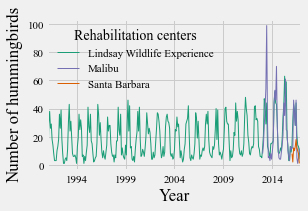

In [79]:
fig, ax = plt.subplots(figsize = [4.5,3])
data.replace('malibu', 'Malibu', inplace = True)
data.groupby([pd.Grouper(freq='M'), 'Place'])['ID'].nunique().unstack().plot(lw=1, ax = ax, color = ['#1b9e77','#7570b3', '#d95f02'])
ax.set_xlabel('Year')
ax.set_ylabel('Number of hummingbirds')
ax.legend(title="Rehabilitation centers", loc = 'best')
plt.tight_layout()
plt.savefig('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Timeline.png', dpi = 600)
plt.show()

In [77]:
data.r.value_counts()

found on the ground          2950
unknown                      1103
nest-related                  943
caught by domestic animal     893
window hit                    663
found inside                  221
suspect torpor-like state     135
Name: r, dtype: int64

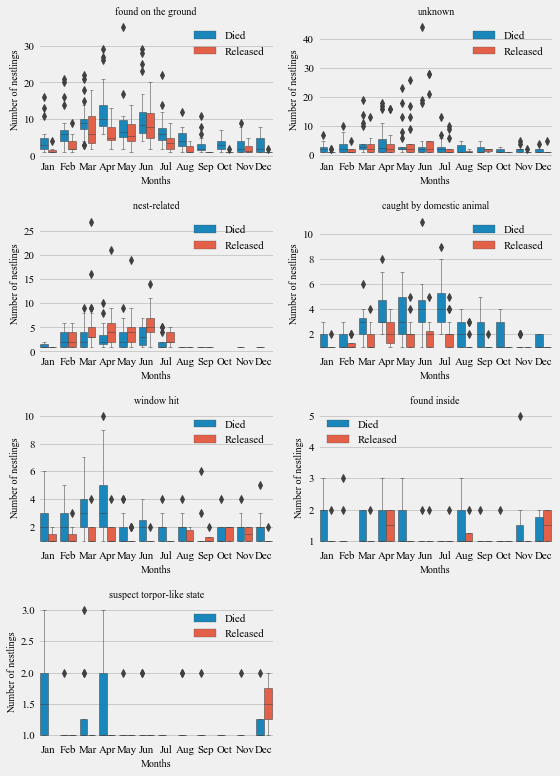

In [78]:
def plot_reason(admit_reason, ax):
    reason = data[data.r ==admit_reason].groupby([pd.Grouper(freq='M'), 'Disposition_binary'])['ID'].nunique().reset_index()
    reason['month2'] = reason['Admitted'].dt.month
    import calendar
    reason['month'] = reason['month2'].apply(lambda x: calendar.month_abbr[x])
    sns.boxplot(data=reason, x= 'month', y='ID', hue='Disposition_binary', linewidth=0.5,
            order=["Jan", "Feb", "Mar",
                  'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sep', 
                  'Oct', 'Nov', 'Dec'],
            ax= ax)
    ax.set_xlabel('Months', fontsize = 10)
    ax.set_ylabel('Number of nestlings', fontsize = 10)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, loc = 'best')
    ax.set_title(admit_reason, fontsize = 10)
    #ax.set_ylim(0, 50)

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8))  = plt.subplots(4,2, figsize = [8,11], sharey = False)

plot_reason(admit_reason='found on the ground', ax = ax1)
plot_reason(admit_reason='unknown', ax = ax2)
plot_reason(admit_reason='nest-related', ax = ax3)
plot_reason(admit_reason='caught by domestic animal', ax = ax4)
plot_reason(admit_reason='window hit', ax = ax5)
plot_reason(admit_reason='found inside', ax = ax6)
plot_reason(admit_reason='suspect torpor-like state', ax = ax7)
ax8.axis('off')
#sns.stripplot(data=month, x= 'month', y='ID', hue='Disposition_binary', c)

#ax2.set_title('(b)', fontsize = 10)
#ax3.set_title('(c)', fontsize = 10)
plt.tight_layout()
plt.savefig('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Final_figures/Reasons_seasonality.svg')
plt.savefig('C:/Users/falco/Desktop/directory/Humminbird_rescue/Outputs/Final_figures/Reasons_seasonality.png', dpi = 600)
plt.show()

## First Aid model

In [79]:
data.columns.tolist()

['Place',
 'Case_Year',
 'Admitted',
 'Found_on',
 'Brought_in_after',
 'City',
 'County',
 'Reason',
 'Reason_edited',
 'Reason_e',
 'First_aid',
 'Species',
 'Species_e',
 'Sex',
 'Sex_e',
 'Age',
 'Age_e',
 'G_O',
 'Disposition',
 'DDate',
 'weight',
 'BCS',
 'attitude',
 'dehydration',
 'head',
 'CNS',
 'cardiopulmonary',
 'GI',
 'musculoskeletal',
 'integument',
 'body',
 'forelimb',
 'forelimb_e',
 'hindlimb',
 'hindlimb_e',
 'treatment',
 'Heat',
 'Fluids',
 'NSAID',
 'Antibiotic',
 'Steroid',
 'treatment_e',
 'admit_date',
 'found_date',
 'ID',
 'r',
 'Disposition_binary',
 'F_Aid',
 'month',
 'season']

In [80]:
treat = data[data.treatment_e == 'yes']
treat[['Heat', 'Fluids', 'NSAID', 'Antibiotic', 'Steroid']].head()

,Heat,Fluids,NSAID,Antibiotic,Steroid
Admitted,,,,,
1991-01-02,Heat,NaN,NaN,NaN,NaN
1991-01-05,Heat,Fluids,NaN,NaN,NaN
1991-02-05,Heat,NaN,NaN,NaN,NaN
1991-03-19,Heat,Fluids,NaN,NaN,NaN
1991-03-20,Heat,NaN,NaN,NaN,NaN


In [81]:
treat.Steroid.unique()

array([nan, 'Dexamethazone'], dtype=object)

In [82]:
treat['Heat'] = treat.Heat.replace('Heat', 1).fillna(0)
treat['Fluids'] = treat.Fluids.replace('Fluids', 1).fillna(0)
treat['NSAID'] = treat.NSAID.replace('Meloxicam', 1).fillna(0)
treat['Antibiotic'] = treat.Antibiotic.replace({ 'Enrofloxacin' : 1, 'Cephalexin' : 1, 'enrofloxacin' : 1, 'Psittavet':1 }).fillna(0)
treat['Steroid'] = treat.Steroid.replace('Dexamethazone', 1).fillna(0)

In [83]:
treat[['Heat', 'Fluids', 'NSAID', 'Antibiotic', 'Steroid']].sum(axis = 1).isna().sum()

0

In [84]:
#data = pd.read_excel('C:/Users/falco/Desktop/directory/Humminbird_rescue/data/Lindsey_treatment_trauma_info_rehab_data _04_08_2019.xlsx')
#data.columns

In [85]:
data['head'].value_counts()

Not examined                                                                                                                                                  17
NSF NSF                                                                                                                                                        6
eyes open                                                                                                                                                      4
No significant findings                                                                                                                                        4
DOA                                                                                                                                                            3
eyes bright                                                                                                                                                    3
None                              

In [86]:
#treat['Head _edited'].value_counts()

In [87]:
data['CNS'].value_counts()

Not examined                                                                                                                                                                                                             19
none seen on intake                                                                                                                                                                                                       7
No significant findings                                                                                                                                                                                                   6
Fluffed                                                                                                                                                                                                                   4
neuro                                                                                                                   

In [88]:
#treat['breathing'].value_counts()

In [89]:
#treat['Gastro edited'].value_counts()

In [90]:
#treat = data[data.Treatment == 'yes']

In [91]:
treat[treat.Age_e == 'Nestling'].Disposition.value_counts()

Released              706
Died +24hr            121
Died in 24hr           84
Euthanized +24hr       69
Euthanized in 24hr     46
Name: Disposition, dtype: int64

In [92]:
treat.shape

(3779, 50)

In [93]:
#treat['Gastro edited'].value_counts()

In [94]:
#treat['Head _edited'].value_counts()

In [95]:
#treat['CNS_edited'].value_counts()

In [96]:
#treat['Musculo edited'].value_counts()

In [97]:
#treat['Intergument edited'].value_counts()

In [98]:
#treat['Body Edited'].value_counts()

In [99]:
#treat['Wings Edited'].value_counts()

In [100]:
treat.shape

(3779, 50)

In [101]:
#treat['Breathing Edited'].value_counts()

In [102]:
#data_with_physical = data_t[(data_t['Breathing Edited'] == 'Yes') | (data_t['Wings Edited'] == 'Yes') | (data_t['Intergument edited'] == 'Yes') | 
#                          (data_t['Intergument edited'] == 'yes') | (data_t['Musculo edited'] == 'Yes') | (data_t['CNS_edited'] == 'Yes') | (data_t['Head _edited'] == 'Yes') | 
#     (data_t['Gastro edited'] == 'Yes')]

In [103]:
#data_withOut_physical = data_t[(data_t['Breathing Edited'] == 'No') | (data_t['Wings Edited'] == 'No') | (data_t['Intergument edited'] == 'No') | 
#                          (data_t['Musculo edited'] == 'No') | (data_t['CNS_edited'] == 'No') | (data_t['Head _edited'] == 'No') | 
#                             (data_t['Gastro edited'] == 'No')]

In [104]:
#data_On_physical = data_t[(~data_t['Breathing Edited'].isnull()) | (~data_t['Wings Edited'].isnull()) | (~data_t['Intergument edited'].isnull()) | 
#                          (~data_t['Musculo edited'].isnull()) | (~data_t['CNS_edited'].isnull()) | (~data_t['Head _edited'].isnull()) | 
#                             (~data_t['Gastro edited'].isnull())]

In [105]:
#data_On_physical.shape

In [106]:
#data_withOut_physical.shape

In [107]:
#data_with_physical.shape

In [108]:
treat['r'].value_counts()

found on the ground          1799
nest-related                  575
caught by domestic animal     520
window hit                    409
unknown                       248
found inside                  140
suspect torpor-like state      88
Name: r, dtype: int64

In [109]:
treat['r'].value_counts().sum()

3779

In [110]:
treat['r'].iloc[1]

'unknown'

In [111]:
#data_t['reason_coll'] = data_t['Reason for admission _edited']

In [112]:
def reason_outouts (c):
    if c.reason_coll == 'hit something' or c.reason_coll == 'Window hit':
        return 'window hit'
    elif c.reason_coll == 'cat caught' or c.reason_coll == 'caught by domestic animal' or c.reason_coll == 'cat caught ':
        return 'pets'
    elif c.reason_coll == 'found on the ground' or c.reason_coll == 'Found in the pool'or c.reason_coll ==  'found on the ground ':
        return 'found on ground'
    elif c.reason_coll == 'Fell out of a nest' or c.reason_coll == 'found in the nest' or c.reason_coll == 'found with the nest':
        return 'nest'
    elif c.reason_coll == 'found inside':
        return 'inside'
    elif c.reason_coll == 'found outside' or c.reason_coll == 'Found at the feeder' or c.reason_coll == 'found on the fence' or c.reason_coll == 'torpor?':
        return 'torpor'
    elif c.reason_coll == 'unknown' or c.reason_coll == '`':
        return 'unknown'

In [113]:
#data_t['r'] = data_t.apply(reason_outouts, axis=1)
treat['r'].value_counts()

found on the ground          1799
nest-related                  575
caught by domestic animal     520
window hit                    409
unknown                       248
found inside                  140
suspect torpor-like state      88
Name: r, dtype: int64

In [114]:
treat['r'].value_counts().sum()

3779

In [115]:
treat.columns.tolist()

['Place',
 'Case_Year',
 'Admitted',
 'Found_on',
 'Brought_in_after',
 'City',
 'County',
 'Reason',
 'Reason_edited',
 'Reason_e',
 'First_aid',
 'Species',
 'Species_e',
 'Sex',
 'Sex_e',
 'Age',
 'Age_e',
 'G_O',
 'Disposition',
 'DDate',
 'weight',
 'BCS',
 'attitude',
 'dehydration',
 'head',
 'CNS',
 'cardiopulmonary',
 'GI',
 'musculoskeletal',
 'integument',
 'body',
 'forelimb',
 'forelimb_e',
 'hindlimb',
 'hindlimb_e',
 'treatment',
 'Heat',
 'Fluids',
 'NSAID',
 'Antibiotic',
 'Steroid',
 'treatment_e',
 'admit_date',
 'found_date',
 'ID',
 'r',
 'Disposition_binary',
 'F_Aid',
 'month',
 'season']

In [116]:
#treat['sugar_water'] = treat['Sugar Water']
#treat['Pain_Med'] =  treat['Pain Medication(meloxicam)']

In [117]:
treat.Disposition_binary.head()

Admitted
1991-01-02    Released
1991-01-05        Died
1991-02-05        Died
1991-03-19        Died
1991-03-20        Died
Name: Disposition_binary, dtype: object

In [118]:
treat.columns.tolist()

['Place',
 'Case_Year',
 'Admitted',
 'Found_on',
 'Brought_in_after',
 'City',
 'County',
 'Reason',
 'Reason_edited',
 'Reason_e',
 'First_aid',
 'Species',
 'Species_e',
 'Sex',
 'Sex_e',
 'Age',
 'Age_e',
 'G_O',
 'Disposition',
 'DDate',
 'weight',
 'BCS',
 'attitude',
 'dehydration',
 'head',
 'CNS',
 'cardiopulmonary',
 'GI',
 'musculoskeletal',
 'integument',
 'body',
 'forelimb',
 'forelimb_e',
 'hindlimb',
 'hindlimb_e',
 'treatment',
 'Heat',
 'Fluids',
 'NSAID',
 'Antibiotic',
 'Steroid',
 'treatment_e',
 'admit_date',
 'found_date',
 'ID',
 'r',
 'Disposition_binary',
 'F_Aid',
 'month',
 'season']

In [119]:
m_d = treat[['Disposition_binary', 'F_Aid', 'Species_e', 'Sex_e', 'Age_e', 'season', 'r', 
            'G_O','Heat' ,'Fluids', 'Steroid',  'NSAID', 'Antibiotic', 'treatment_e']]


In [120]:
treat.Disposition_binary.value_counts()

Died        2152
Released    1627
Name: Disposition_binary, dtype: int64

In [121]:
treat.Disposition_binary.value_counts().sum()

3779

In [122]:
m_d.shape

(3779, 14)

In [123]:
data.shape

(6908, 50)

In [124]:
treat.F_Aid.value_counts()

No     2429
Yes    1350
Name: F_Aid, dtype: int64

In [125]:
treat.F_Aid.value_counts().sum()

3779

In [126]:
treat = treat[(treat.G_O == 'Non-selasphorus spp.') |(treat.G_O == 'Selasphorus spp.')]

In [127]:
treat.to_csv('C:/Users/falco/Desktop/directory/Humminbird_rescue/data/Treatment_model_data_subset.csv')

In [128]:
from datetime import datetime as dt
end = dt.now()
print(end-start)

0:00:32.718193
